# Personalized Recommendation Systems

## 1. Exploratory Data Analysis

In [1]:
%%capture
!pip install wordcloud
!pip install seaborn --upgrade

In [2]:
%%capture
!pip install nltk
!pip install gensim

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [4]:
# Random State for the entirety of the exercise
rs = 123

In [5]:
# load data
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

### 1.1 Course DF

In [6]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [7]:
course_df.shape

(307, 16)

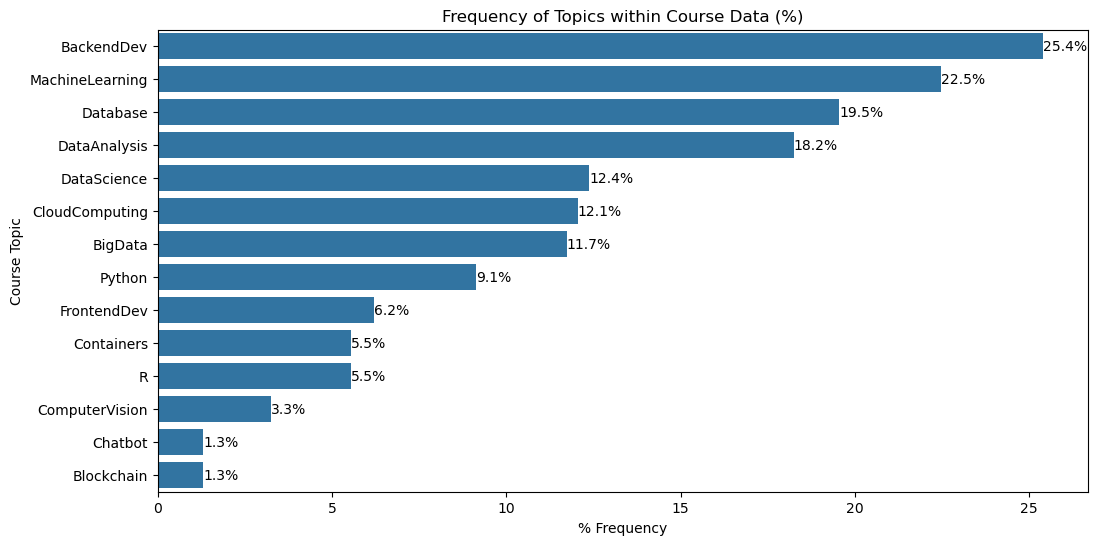

In [8]:
topics = course_df.columns[~course_df.columns.isin(['COURSE_ID', 'TITLE'])]

# # Frequency of each course
# sum_values = course_df[topics].sum().sort_values(ascending=False)

# Frequency% of each course
relative_sum = (course_df[topics].sum() / len(course_df)) * 100

# Sort the values in descending order
relative_sum = relative_sum.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=relative_sum.values, y=relative_sum.index)

# Add labels in n% format on top of the bars
for i, v in enumerate(relative_sum.values):
    ax.text(v, i, f'{v:.1f}%', color='black', ha="left", va="center")

# Set labels
plt.xlabel('% Frequency')
plt.ylabel('Course Topic')
plt.title('Frequency of Topics within Course Data (%)')

# Show the plot
plt.show()


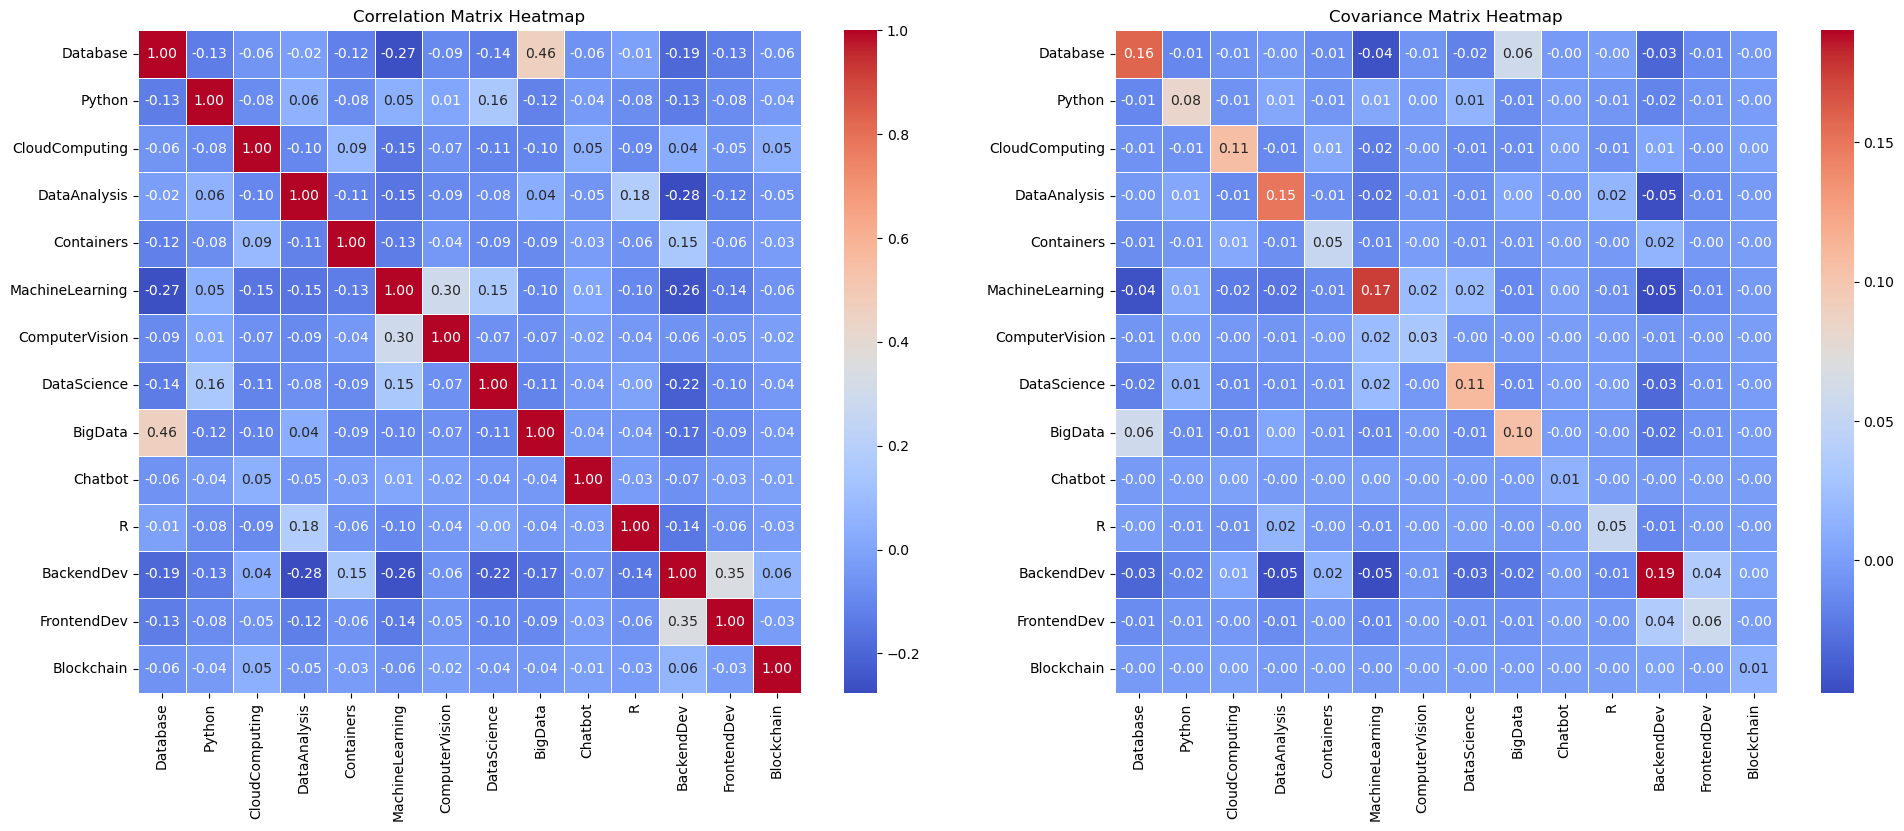

In [9]:
# Calculate the correlation matrix
corr_matrix = course_df[topics].corr()

# Calculate the covariance matrix
cov_matrix = course_df[topics].cov()

# Create a grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, ax=axes[0], linewidths=0.5, linecolor='white')
axes[0].set_title('Correlation Matrix Heatmap')

# Plot the covariance matrix heatmap
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, ax=axes[1], linewidths=0.5, linecolor='white')
axes[1].set_title('Covariance Matrix Heatmap')


# Show the plot
plt.tight_layout()
plt.show()

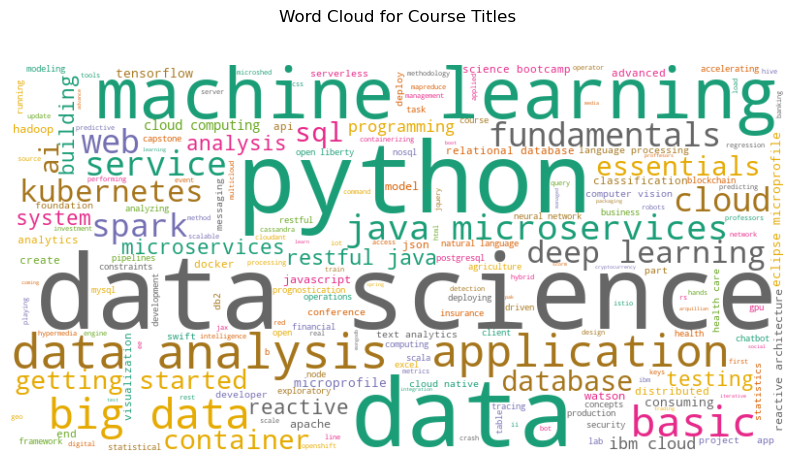

In [10]:
# Additional stopwords you want to include
custom_stopwords = {'Using', 'build', 'use', 'checking', 'image', 'accessing', 'enabling', 
                    'hotdog', 'getting started', 'working', 'university', 'introduction', 'microservice'}

# Combine the custom stopwords with the default STOPWORDS
all_stopwords = STOPWORDS.union(custom_stopwords)

# Combine all titles into one large string
text = " ".join(course_df['TITLE'].dropna().astype(str))

# Create the word cloud object with the updated stopwords
wordcloud = WordCloud(stopwords=all_stopwords, background_color="white", width=800, height=400, colormap='Dark2').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title('Word Cloud for Course Titles\n\n')
plt.show()


### 1.2 Ratings DF

In [11]:
print(ratings_df.head())

      user        item  rating
0  1889878    CC0101EN       5
1  1342067    CL0101EN       3
2  1990814  ML0120ENv3       5
3   380098    BD0211EN       5
4   779563    DS0101EN       3


In [12]:
# Pivot table: Average rating per user
pivot_user = ratings_df.pivot_table(values='rating', index='user', aggfunc='mean')

print("Average ratings per user:")
pivot_user.head()

Average ratings per user:


,rating
user,
2,3.950820
4,3.931818
5,3.915254
7,4.000000
8,4.333333


In [13]:
# Pivot table: Average rating per item
pivot_item = ratings_df.pivot_table(values='rating', index='item', aggfunc='mean')

print("Average ratings per item:")
pivot_item.head()

Average ratings per item:


,rating
item,
AI0111EN,3.890339
BC0101EN,3.998661
BC0201EN,4.004187
BC0202EN,3.997419
BD0101EN,3.997141


/tmp/wsuser/ipykernel_140/3806301654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_item.head(20).index, y=avg_rating_per_item.head(20).values, palette='viridis')


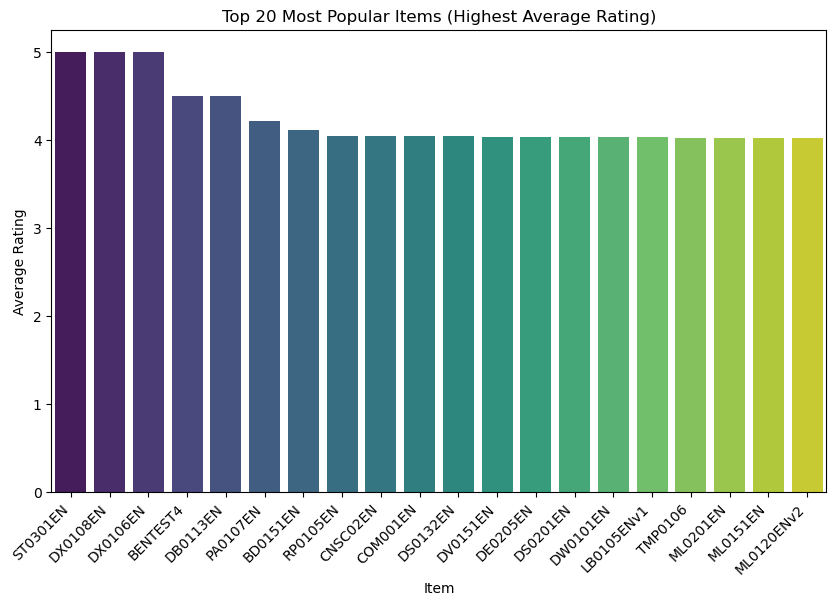

In [14]:
# Compute average rating per item
avg_rating_per_item = ratings_df.groupby('item')['rating'].mean().sort_values(ascending=False)

# Plotting the most popular items
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_per_item.head(20).index, y=avg_rating_per_item.head(20).values, palette='viridis')
plt.title('Top 20 Most Popular Items (Highest Average Rating)')
plt.xlabel('Item')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


In [15]:
item_popularity = ratings_df.groupby('item')['rating'].count().sort_values(ascending=False).reset_index()
item_popularity

,item,rating
0,PY0101EN,14936
1,DS0101EN,14477
2,BD0101EN,13291
3,BD0111EN,10599
4,DA0101EN,8303
...,...,...
121,ST0201EN,1
122,ST0301EN,1
123,DX0106EN,1
124,DX0108EN,1


In [16]:
top_items = pd.merge(course_df[['COURSE_ID', 'TITLE']], 
                     item_popularity[['item', 'rating']], 
                     left_on='COURSE_ID', 
                     right_on='item', 
                     how='inner') 

top_items = top_items.sort_values(by='rating', ascending=False).head(20)
top_items[['COURSE_ID', 'TITLE', 'rating']]

,COURSE_ID,TITLE,rating
113,PY0101EN,python for data science,14936
106,DS0101EN,introduction to data science,14477
94,BD0101EN,big data 101,13291
109,BD0111EN,hadoop 101,10599
104,DA0101EN,data analysis with python,8303
86,DS0103EN,data science methodology,7719
103,ML0101ENv3,machine learning with python,7644
62,BD0211EN,spark fundamentals i,7551
85,DS0105EN,data science hands on with open source tools,7199
53,BC0101EN,blockchain essentials,6719


/tmp/wsuser/ipykernel_140/4265050941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COURSE_ID', y='rating', data=top_items, palette='Blues')


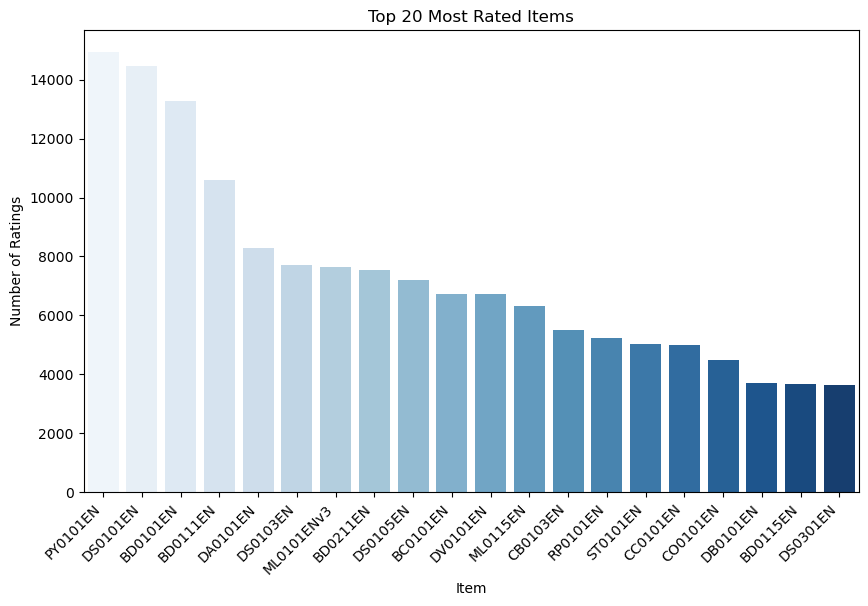

In [17]:
# Plotting the most rated items
plt.figure(figsize=(10, 6))
sns.barplot(x='COURSE_ID', y='rating', data=top_items, palette='Blues')
plt.title('Top 20 Most Rated Items')
plt.xlabel('Item')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


Correlation between average rating per item and item popularity: -0.04058395147880707


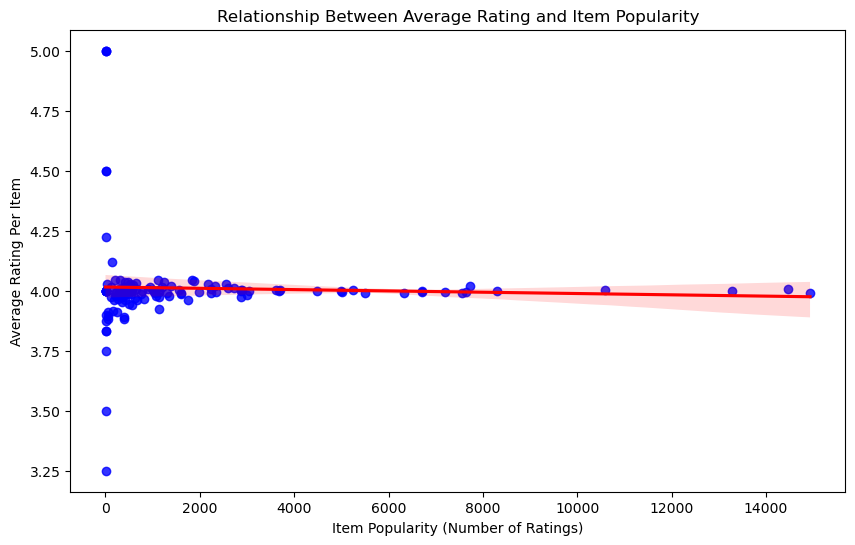

In [18]:
# Calculate avg_rating_per_item
avg_rating_per_item = ratings_df.groupby('item')['rating'].mean()

# Calculate item_popularity (number of ratings per item)
item_popularity = ratings_df.groupby('item')['rating'].count()

# Align the two Series to have the same index (items)
combined_df = pd.DataFrame({
    'avg_rating_per_item': avg_rating_per_item,
    'item_popularity': item_popularity
}).dropna()

# Calculate the correlation between avg_rating_per_item and item_popularity
correlation = combined_df['avg_rating_per_item'].corr(combined_df['item_popularity'])

print(f"Correlation between average rating per item and item popularity: {correlation}")

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='item_popularity', y='avg_rating_per_item', data=combined_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between Average Rating and Item Popularity')
plt.xlabel('Item Popularity (Number of Ratings)')
plt.ylabel('Average Rating Per Item')
plt.show()

In [19]:
# # Count the number of ratings by each user
# user_activity = ratings_df.groupby('user')['rating'].count().sort_values(ascending=False)

# # Plotting the most active users
# plt.figure(figsize=(10, 6))
# sns.barplot(x=user_activity.head(10).index, y=user_activity.head(10).values, palette='magma')
# plt.title('Top 10 Most Active Users')
# plt.xlabel('User')
# plt.ylabel('Number of Ratings')
# plt.xticks(rotation=45, ha='right')
# plt.show()

In [20]:
# # Plotting the distribution of ratings
# plt.figure(figsize=(8, 6))
# sns.countplot(x='rating', data=ratings_df, palette='coolwarm')
# plt.title('Distribution of Ratings')
# plt.xlabel('Rating')
# plt.ylabel('Count')
# plt.show()

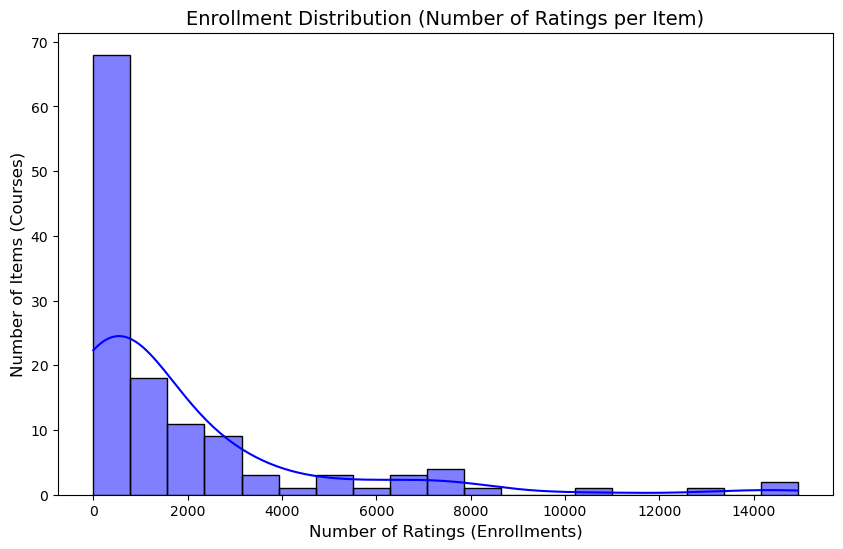

In [21]:
# Count how many times each item has been rated (this represents the number of enrollments per item)
enrollment_distribution = ratings_df['item'].value_counts()

# Plotting the histogram of the enrollments distribution
plt.figure(figsize=(10, 6))
sns.histplot(enrollment_distribution, kde=True, color='blue')

# Adding labels and title
plt.title('Enrollment Distribution (Number of Ratings per Item)', fontsize=14)
plt.xlabel('Number of Ratings (Enrollments)', fontsize=12)
plt.ylabel('Number of Items (Courses)', fontsize=12)
plt.show()

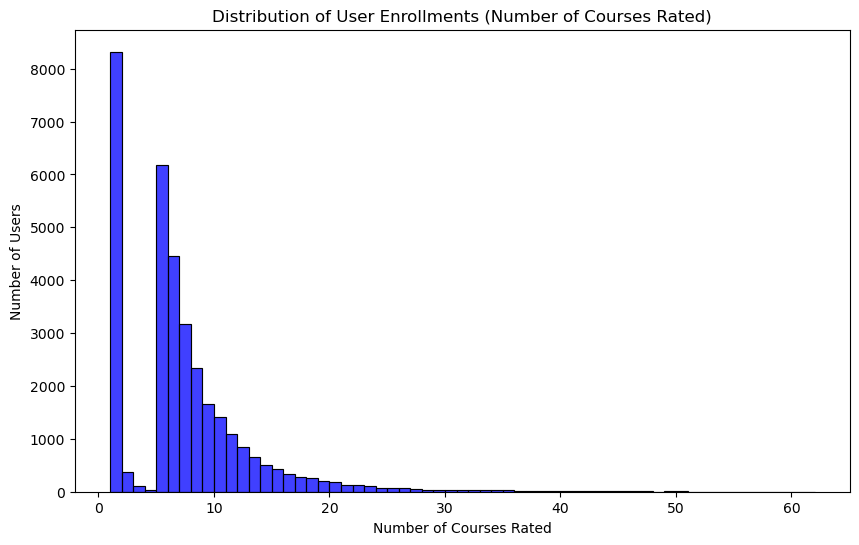

In [22]:
# Count the number of unique items (courses) rated by each user
user_enrollment_counts = ratings_df.groupby('user')['item'].nunique()

# Plotting the histogram of enrollments
plt.figure(figsize=(10, 6))
sns.histplot(user_enrollment_counts, kde=False, bins=range(1, user_enrollment_counts.max() + 2), color='blue')
plt.title('Distribution of User Enrollments (Number of Courses Rated)')
plt.xlabel('Number of Courses Rated')
plt.ylabel('Number of Users')
plt.show()

# 2. User-Based Recommender System

We will use the ratings that each user gave to the each course to recommend new courses.


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [24]:
# Step 1: Merge course data with ratings data to get ratings for courses
merged_df = pd.merge(ratings_df, course_df, left_on='item', right_on='COURSE_ID').drop('COURSE_ID', axis=1)
merged_df.head()

,user,item,rating,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,1889878,CC0101EN,5,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1858700,CC0101EN,4,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1211012,CC0101EN,4,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,928820,CC0101EN,5,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1979095,CC0101EN,4,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
merged_df[['rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
rating,233306.0,3.998448,0.816058,3.0,3.0,4.0,5.0,5.0


In [26]:
# Step 2: Create a user profile
# First, filter out only the highly rated courses (e.g., rating >= 4)
high_rated_courses = merged_df[merged_df['rating'] >= 4]
high_rated_courses.head()

,user,item,rating,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,1889878,CC0101EN,5,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1858700,CC0101EN,4,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1211012,CC0101EN,4,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,928820,CC0101EN,5,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1979095,CC0101EN,4,introduction to cloud,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [27]:
print(topics)

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')


In [28]:
# Create a user profile by averaging the genre features of the highly rated courses
# user_profiles = high_rated_courses.drop(columns=(['TITLE']))
user_profiles = high_rated_courses.groupby('user')[topics].mean()
user_profiles.head()

,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
user,,,,,,,,,,,,,,
2,0.384615,0.102564,0.025641,0.282051,0.025641,0.230769,0.0,0.230769,0.307692,0.000000,0.128205,0.128205,0.000000,0.051282
4,0.458333,0.041667,0.000000,0.125000,0.000000,0.208333,0.0,0.333333,0.250000,0.000000,0.083333,0.000000,0.000000,0.041667
5,0.210526,0.078947,0.157895,0.210526,0.000000,0.263158,0.0,0.236842,0.157895,0.026316,0.131579,0.184211,0.026316,0.052632
7,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000


In [29]:
# Step 3: Calculate the cosine similarity between user profiles and course profiles
course_profiles = course_df[topics]

# Initialize an empty list to store recommendations
recommendations = {}

# Compute cosine similarity between each user profile and all course profiles
for user_id, user_profile in user_profiles.iterrows():
    # Calculate the similarity of the user's profile with all courses
    similarities = cosine_similarity([user_profile], course_profiles)[0]
    
    # Get the top 3 most similar courses for the user
    top_courses_idx = similarities.argsort()[-3:][::-1]  # Get indices of top 3 similar courses
    
    # Get the course IDs corresponding to those top courses
    recommended_courses = course_df.iloc[top_courses_idx]['COURSE_ID'].values
    
    recommendations[user_id] = recommended_courses

In [30]:
#Step 4: Display recommendations for each user
for user_id, recommended_courses in recommendations.items():
    print(f"Recommended courses for user {user_id}: {', '.join(recommended_courses)}")

Recommended courses for user 2: SC0103EN, excourse73, excourse72
Recommended courses for user 4: excourse04, excourse06, GPXX097UEN
Recommended courses for user 5: GPXX0IBEN, TA0106EN, RP0105EN
Recommended courses for user 7: excourse72, excourse73, BD0211EN
Recommended courses for user 8: RP0105EN, BD0211EN, SC0103EN
Recommended courses for user 9: BD0212EN, BD0211EN, TMP0105EN
Recommended courses for user 12: GPXX0IBEN, excourse22, excourse21
Recommended courses for user 16: ML0101EN, BD0212EN, excourse73
Recommended courses for user 19: BD0111EN, excourse42, excourse70
Recommended courses for user 20: excourse93, GPXX0ADEN, GPXX0ZG0EN
Recommended courses for user 21: excourse03, BD0115EN, excourse10
Recommended courses for user 23: BD0212EN, excourse73, excourse72
Recommended courses for user 25: TMP0105EN, BD0211EN, BD0212EN
Recommended courses for user 26: GPXX0725EN, DB0101EN, excourse07
Recommended courses for user 27: excourse93, GPXX0ADEN, GPXX0ZG0EN
Recommended courses for us

### TEST ON SINGLE PROFILE USING A FUNCTION

In [31]:
def get_top_recommendations(user_id, user_profiles, course_df, top_n=3):
    """
    Function to get top N course recommendations for a user based on cosine similarity.

    Args:
    - user_id (int): The ID of the user to get recommendations for.
    - user_profiles (DataFrame): The DataFrame containing user profiles with average genre features.
    - course_df (DataFrame): The DataFrame containing course information.
    - top_n (int): The number of top recommendations to return (default is 3).

    Returns:
    - DataFrame: A DataFrame containing the recommended courses and their cosine similarity scores.
    """
    # Ensure user profile exists
    if user_id not in user_profiles.index:
        raise ValueError(f"User ID {user_id} not found in the user profiles.")

    # Get the user profile for the selected user
    user_profile = user_profiles.loc[user_id].values.reshape(1, -1)

    # Extract the course features for the cosine similarity computation
    course_profiles = course_df[topics]

    # Calculate the cosine similarity between the user's profile and all course profiles
    similarities = cosine_similarity(user_profile, course_profiles)[0]

    # Get the indices of the top N most similar courses
    top_courses_idx = similarities.argsort()[-top_n:][::-1]  # Get indices of top N similar courses

    # Get the course IDs and corresponding cosine similarities
    recommended_courses = course_df.iloc[top_courses_idx]['COURSE_ID'].values
    recommended_similarities = similarities[top_courses_idx]

    # Create a DataFrame with course IDs and similarities
    recommendations_df = pd.DataFrame({
        'COURSE_ID': recommended_courses,
        'Cosine_Similarity': recommended_similarities
    })

    return recommendations_df

In [32]:
# Example:
user_id = 1889878  # Example user ID
recommendations = get_top_recommendations(user_id, user_profiles, course_df, top_n=3)
recommendations


,COURSE_ID,Cosine_Similarity
0,SW0101EN,0.751469
1,SW0201EN,0.751469
2,GPXX0TY1EN,0.626224


### On Test Data

In [33]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
test_ratings = pd.read_csv(test_users_url)
print(test_ratings.shape)
test_ratings.head()

(233306, 3)


,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [34]:
def recommend_for_test_set(test_rating, user_profiles, course_df, threshold=0.5, top_n=3):
    """
    Generates recommendations for users in the test dataset based on cosine similarity.

    Args:
    - test_rating (DataFrame): The test dataset containing user-item interactions.
    - user_profiles (DataFrame): The user profiles with averaged topic features.
    - course_df (DataFrame): The dataset containing course features.
    - threshold (float): The minimum cosine similarity score to consider a recommendation.
    - top_n (int): The number of recommendations per user.

    Returns:
    - DataFrame: A DataFrame containing user, recommended course IDs, and similarity scores.
    """
    recommendations_list = []  # Store recommendations

    for user_id in test_rating['user'].unique():
        if user_id not in user_profiles.index:
            continue  # Skip users not in user_profiles

        # Get the user profile
        user_profile = user_profiles.loc[user_id].values.reshape(1, -1)
        
        # Compute cosine similarity with all course profiles
        course_profiles = course_df[topics]  # Extract course features
        similarities = cosine_similarity(user_profile, course_profiles)[0]
        
        # Filter courses by similarity threshold
        above_threshold_idx = similarities >= threshold
        if not any(above_threshold_idx):
            continue  # Skip if no courses meet the threshold

        # Get top N recommendations
        top_courses_idx = similarities.argsort()[-top_n:][::-1]  # Sort and select top N
        recommended_courses = course_df.iloc[top_courses_idx]['COURSE_ID'].values
        recommended_similarities = similarities[top_courses_idx]

        # Append to list
        for course_id, sim_score in zip(recommended_courses, recommended_similarities):
            recommendations_list.append({'user': user_id, 'COURSE_ID': course_id, 'Cosine_Similarity': sim_score})

    # Convert recommendations to DataFrame
    recommendations_df = pd.DataFrame(recommendations_list)
    
    return recommendations_df

# Example Usage:
threshold = 0.5
recommendations = recommend_for_test_set(test_ratings, user_profiles, course_df, threshold, top_n=3)
print(recommendations)

          user   COURSE_ID  Cosine_Similarity
0      1889878    SW0101EN           0.751469
1      1889878    SW0201EN           0.751469
2      1889878  GPXX0TY1EN           0.626224
3      1342067    BD0141EN           0.952579
4      1342067  excourse42           0.952579
...        ...         ...                ...
93295   946438  excourse24           0.707107
93296   946438  excourse29           0.707107
93297   711047    CB0101EN           1.000000
93298   711047    CB0103EN           1.000000
93299   711047  GPXX0QQ3EN           0.707107

[93300 rows x 3 columns]


In [35]:
this_id = 1889878

recommendations[recommendations.user==this_id]

,user,COURSE_ID,Cosine_Similarity
0,1889878,SW0101EN,0.751469
1,1889878,SW0201EN,0.751469
2,1889878,GPXX0TY1EN,0.626224


In [36]:
# TOP 10 courses
course_counts = recommendations['COURSE_ID'].value_counts().reset_index().head(10)
course_counts.columns = ['COURSE_ID', 'Times_Recommended']

# Map Course Name
course_id_to_title = course_df.set_index('COURSE_ID')['TITLE'].to_dict()
course_counts['TITLE'] = course_counts['COURSE_ID'].map(course_id_to_title)

# Reorder Columns
course_counts = course_counts[['COURSE_ID', 'TITLE', 'Times_Recommended']]
course_counts

,COURSE_ID,TITLE,Times_Recommended
0,ML0122EN,accelerating deep learning with gpu,3014
1,excourse21,applied machine learning in python,2117
2,BD0211EN,spark fundamentals i,1953
3,BD0115EN,mapreduce and yarn,1897
4,excourse22,introduction to data science in python,1849
5,TMP0105EN,getting started with the data apache spark ma...,1803
6,ML0101EN,machine learning with python,1785
7,excourse72,foundations for big data analysis with sql,1780
8,BD0212EN,spark fundamentals ii,1758
9,SC0103EN,spark overview for scala analytics,1646


In [37]:
## TEST
grouped_courses = recommendations.groupby('COURSE_ID')['user'].count().reset_index(name='Times_Recommended').sort_values(by='Times_Recommended',ascending=False).head(10)
grouped_courses

,COURSE_ID,Times_Recommended
163,ML0122EN,3014
216,excourse21,2117
18,BD0211EN,1953
6,BD0115EN,1897
217,excourse22,1849
191,TMP0105EN,1803
154,ML0101EN,1785
260,excourse72,1780
19,BD0212EN,1758
179,SC0103EN,1646


## 3. Course-Based Recommender System

In [38]:
import gensim
import nltk as nltk

from scipy.spatial.distance import cosine
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from gensim import corpora

from sklearn.metrics.pairwise import cosine_similarity


In [39]:
course_df.head(3)

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [40]:
ratings_df.head(3)

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5


In [41]:
def generate_sparse_bow_v2(course, vocabulary):
    """
    Generate a sparse bag-of-words (BoW) representation for a given course using a predefined vocabulary.

    Parameters:
    course (str): The input course text to generate the BoW representation for.
    vocabulary (list): A list of all possible words to include in the BoW representation.

    Returns:
    list: A sparse BoW representation where each element corresponds to the presence (1) or absence (0)
    of a word in the input course text, according to the predefined vocabulary.
    """

    # Tokenize the course text by splitting it into words
    words = set(course.split())

    # Initialize a BoW vector with 0's, one for each word in the vocabulary
    bow_vector = [1 if word in words else 0 for word in vocabulary]

    # Return the sparse BoW vector
    return bow_vector

In [42]:
#### STEP 1: Create a token dictionary dataframe (or import it)

# Load the BoW features as Pandas dataframe
bows_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
bows_df = pd.read_csv(bows_url)
bows_df = bows_df[['doc_id', 'token', 'bow']]
bows_df.head()

,doc_id,token,bow
0,ML0201EN,ai,2
1,ML0201EN,apps,2
2,ML0201EN,build,2
3,ML0201EN,cloud,1
4,ML0201EN,coming,1


In [43]:
### STEP 2: Pivot bows_df to create a course-term matrix
bows_matrix = bows_df.pivot(index='doc_id', columns='token', values='bow').fillna(0)
bows_matrix.head()

token,1st,3d,ability,able,abstraction,aca,academia,academic,accelerate,accelerated,...,zoom,¬†,–,—,‘,‚,‚äì,“,”,•
doc_id,,,,,,,,,,,,,,,,,,,,,
AI0111EN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC0101EN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC0201EN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC0202EN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BD0101EN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
### STEP 3: Compute cosine similarity
similarity_matrix = cosine_similarity(bows_matrix)

# Convert to DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=bows_matrix.index, columns=bows_matrix.index)

similarity_df.head()

doc_id,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,BD0131EN,...,excourse84,excourse85,excourse86,excourse87,excourse88,excourse89,excourse90,excourse91,excourse92,excourse93
doc_id,,,,,,,,,,,,,,,,,,,,,
AI0111EN,1.000000,0.044281,0.028583,0.025286,0.041595,0.035007,0.000000,0.000000,0.033634,0.025286,...,0.139512,0.057166,0.073127,0.045531,0.018939,0.082897,0.062539,0.085453,0.092082,0.064533
BC0101EN,0.044281,1.000000,0.387298,0.190347,0.031311,0.000000,0.000000,0.000000,0.050637,0.000000,...,0.028006,0.000000,0.000000,0.017137,0.057027,0.074883,0.094155,0.096490,0.051988,0.000000
BC0201EN,0.028583,0.387298,1.000000,0.270310,0.020211,0.000000,0.000000,0.000000,0.065372,0.024574,...,0.000000,0.022222,0.011844,0.077434,0.018405,0.016112,0.048622,0.076125,0.055930,0.000000
BC0202EN,0.025286,0.190347,0.270310,1.000000,0.017880,0.000000,0.000000,0.000000,0.028916,0.000000,...,0.007996,0.009829,0.000000,0.039144,0.000000,0.014254,0.053767,0.073466,0.029687,0.000000
BD0101EN,0.041595,0.031311,0.020211,0.017880,1.000000,0.445566,0.278207,0.097092,0.142695,0.268199,...,0.065767,0.226367,0.198217,0.040244,0.013392,0.082064,0.035377,0.045318,0.097668,0.136895


In [45]:
# Get the most similar courses based on a threshold
threshold = 0.6
recommendations = []
for course_id in similarity_df.index:
    similar_courses = similarity_df.loc[course_id].drop(course_id)  # Exclude self-similarity
    filtered_courses = similar_courses[similar_courses >= threshold].sort_values(ascending=False)
    
    for recommended_course, similarity_score in filtered_courses.items():
        course_title = course_df.loc[course_df['COURSE_ID'] == course_id, 'TITLE'].values[0]
        recommended_title = course_df.loc[course_df['COURSE_ID'] == recommended_course, 'TITLE'].values[0]
        recommendations.append((course_id, course_title, recommended_course, recommended_title, similarity_score))

# Create final recommendation DataFrame
recommendation_bow = pd.DataFrame(recommendations, columns=['COURSE_ID', 'TITLE', 'RECOMMENDED_COURSE', 'RECOMMENDED_COURSE_TITLE', 'SIMILARITY_SCORE'])

# Display the result
recommendation_bow

,COURSE_ID,TITLE,RECOMMENDED_COURSE,RECOMMENDED_COURSE_TITLE,SIMILARITY_SCORE
0,BD0101EN,big data 101,excourse67,introduction to big data,0.708214
1,BD0101EN,big data 101,excourse72,foundations for big data analysis with sql,0.652535
2,BD0101EN,big data 101,excourse74,fundamentals of big data,0.650071
3,BD0101EN,big data 101,BD0145EN,sql access for hadoop,0.623544
4,BD0101EN,big data 101,excourse68,big data modeling and management systems,0.616759
...,...,...,...,...,...
345,excourse82,getting started with data visualization in r,excourse37,data analysis with r programming,0.631536
346,excourse82,getting started with data visualization in r,excourse81,data analysis with r programming,0.631536
347,excourse85,data visualization in r with ggplot2,excourse82,getting started with data visualization in r,0.841873
348,excourse86,the r programming environment,excourse37,data analysis with r programming,0.661440


In [46]:
print(recommendation_bow.head(3))

  COURSE_ID         TITLE RECOMMENDED_COURSE  \
0  BD0101EN  big data 101         excourse67   
1  BD0101EN  big data 101         excourse72   
2  BD0101EN  big data 101         excourse74   

                     RECOMMENDED_COURSE_TITLE  SIMILARITY_SCORE  
0                    introduction to big data          0.708214  
1  foundations for big data analysis with sql          0.652535  
2                    fundamentals of big data          0.650071  


In [47]:
### How many courses are suggested for each course?
recommendations_by_course_id = recommendation_bow.groupby('COURSE_ID')[['RECOMMENDED_COURSE']].agg('count').mean()
recommendations_by_course_id

RECOMMENDED_COURSE    3.017241
dtype: float64

#### Example Usage

In [48]:
### TEST: Print recommended courses title
this_course_title = 'big data 101'

print(f'CONGRATULATION FOR COMPLETING `{this_course_title}`!\nYou may also be interested in the following courses:')
print('-'*50)
recommendations = recommendation_bow[recommendation_bow.TITLE == this_course_title]
for course in recommendations.RECOMMENDED_COURSE_TITLE:
    print(f">>  {course}")

CONGRATULATION FOR COMPLETING `big data 101`!
You may also be interested in the following courses:
--------------------------------------------------
>>  introduction to big data
>>  foundations for big data analysis with sql
>>  fundamentals of big data
>>  sql access for hadoop
>>  big data modeling and management systems


#### Top Recommended Courses

In [55]:
# Step 1: Remove rows where TITLE and RECOMMENDED_COURSE_TITLE are the same
sort = recommendation_bow[recommendation_bow['TITLE'] != recommendation_bow['RECOMMENDED_COURSE_TITLE']]

# Step 2: Sort by SIMILARITY_SCORE in descending order to keep the highest scores
sort = sort.sort_values(by='SIMILARITY_SCORE', ascending=False)

# Step 3: Drop duplicates based on RECOMMENDED_COURSE and RECOMMENDED_COURSE_TITLE, keeping the one with the highest SIMILARITY_SCORE
sort = sort.drop_duplicates(subset=['RECOMMENDED_COURSE', 'RECOMMENDED_COURSE_TITLE'], keep='first')
sort.reset_index(drop=True, inplace=True)
# Step 4: Select the relevant columns to view the result
sort[['RECOMMENDED_COURSE', 'RECOMMENDED_COURSE_TITLE', 'SIMILARITY_SCORE']].head(10)


,RECOMMENDED_COURSE,RECOMMENDED_COURSE_TITLE,SIMILARITY_SCORE
0,excourse29,cloud computing concepts part 2,1.000000
1,excourse27,cloud computing concepts part 1,1.000000
2,ML0122ENv1,accelerating deep learning with gpu,0.982873
3,ML0120ENv2,deep learning with tensorflow,0.982873
4,ML0120ENv3,deep learning with tensorflow,0.982873
5,ML0120EN,deep learning with tensorflow,0.982873
6,DX0107EN,data science bootcamp with python for universi...,0.979796
7,DX0108EN,data science bootcamp with python for universi...,0.979796
8,TMP0106,tmp data science bootcamp,0.947623
9,DX0106EN,data science bootcamp with r for university pr...,0.947623


In [56]:
### How many courses are suggested for each course?
sort_sorted = sort.groupby('COURSE_ID')[['RECOMMENDED_COURSE']].agg('count').mean()
sort_sorted

RECOMMENDED_COURSE    1.4
dtype: float64

In [ ]:
course_counts = recommendation_bow[['RECOMMENDED_COURSE', 'RECOMMENDED_COURSE_TITLE']].value_counts().reset_index().head(10)
course_counts.rename(columns={'count':'Times_Recommended', 'RECOMMENDED_COURSE_TITLE':'TITLE'}, inplace=True)
course_counts = course_counts[['RECOMMENDED_COURSE', 'TITLE', 'Times_Recommended']]
course_counts

In [ ]:
course_counts['Times_Recommended'].mean()

### Implementation

In [ ]:
ratings_df.head(3)

In [ ]:
# Step 1: Filter ratings_df to get users with rating > 3
rated_users = ratings_df[ratings_df['rating'] > 3]

# Step 2: Merge the ratings_df with the recommendations based on COURSE_ID
recommendations = pd.merge(rated_users, recommendation_bow, left_on='item', right_on='COURSE_ID', how='left')

# Step 3: Create the final recommendation dataframe
recommendations_df = recommendations[['user', 'RECOMMENDED_COURSE', 'RECOMMENDED_COURSE_TITLE', 'SIMILARITY_SCORE']]

# View the recommendations dataframe
recommendations_df.head()

In [ ]:
course_counts = recommendations_df[['RECOMMENDED_COURSE', 'RECOMMENDED_COURSE_TITLE']].value_counts().reset_index().head(10)
course_counts.rename(columns={'count':'Times_Recommended', 'RECOMMENDED_COURSE_TITLE':'TITLE'}, inplace=True)
course_counts = course_counts[['RECOMMENDED_COURSE', 'TITLE', 'Times_Recommended']]
course_counts

## OTHER APPROACH

In [ ]:
# Extract course IDs and feature matrix
course_ids = course_df["COURSE_ID"]
course_features = course_df[topics]

In [ ]:
# Compute cosine similarity
cosine_sim = cosine_similarity(course_features)

In [ ]:
# Create a DataFrame for similarity scores
course_sim_df = pd.DataFrame(cosine_sim, index=course_ids, columns=course_ids)

In [ ]:
# Function to recommend courses based on similarity
def recommend_courses(user_id, top_n=5):
    # Get courses the user has rated highly (rating >= 4)
    user_courses = ratings_df[(ratings_df["user"] == user_id) & (ratings_df["rating"] >= 4)]["item"].tolist()
    
    if not user_courses:
        return "No recommendations available (user hasn't rated any courses highly)."
    
    # Get similarity scores for these courses
    similar_courses = pd.Series(dtype=float)
    for course in user_courses:
        if course in course_sim_df.index:
            similar_courses = similar_courses.add(course_sim_df[course], fill_value=0)

    # Remove courses the user has already taken
    similar_courses = similar_courses.drop(labels=user_courses, errors="ignore")
    
    # Sort and return top N recommendations
    recommended_courses = similar_courses.sort_values(ascending=False).head(top_n)
    
    return recommended_courses


In [ ]:
# Example: Recommend courses for user 1889878
recommend_courses(1889878, top_n=3)

### On Test Set

In [ ]:
def recommend_courses_for_all(test_ratings, course_sim_df, top_n=5):
    # Create an empty list to store the results
    recommendation_list = []

    # Loop through each user in the test set
    for user_id in test_ratings['user'].unique():
        # Get courses the user has rated highly (rating >= 4)
        user_courses = test_ratings[(test_ratings["user"] == user_id) & (test_ratings["rating"] >= 4)]["item"].tolist()
        
        if not user_courses:
            continue  # Skip users who haven't rated any courses highly
        
        # Get similarity scores for these courses
        similar_courses = pd.Series(dtype=float)
        for course in user_courses:
            if course in course_sim_df.index:
                similar_courses = similar_courses.add(course_sim_df[course], fill_value=0)

        # Remove courses the user has already taken (avoid recommending courses already rated)
        similar_courses = similar_courses.drop(labels=user_courses, errors="ignore")
        
        # Sort and get top N recommended courses
        recommended_courses = similar_courses.sort_values(ascending=False).head(top_n)
        
        # Add the recommendations to the list with user_id, recommended course, and similarity score
        for course, score in recommended_courses.items():
            recommendation_list.append({
                "user_id": user_id,
                "recommended_course": course,
                "similarity_score": score
            })
    
    # Convert the list of recommendations to a DataFrame
    recommendation_df = pd.DataFrame(recommendation_list)
    
    return recommendation_df


In [ ]:
user_courses = test_ratings[(test_ratings["user"] == user_id) & (test_ratings["rating"] >= 4)]["item"].tolist()

In [ ]:
recommendations_df = recommend_courses_for_all(test_ratings, course_sim_df, top_n=3)

In [ ]:
this_id = 1889878

recommendations_df[recommendations_df.user_id==this_id]

In [ ]:
recommendations_df

In [ ]:
course_counts = recommendations_df['recommended_course'].value_counts().reset_index().head(10)
course_counts.rename(columns={'count':'Times_Recommended', 'recommended_course': 'COURSE_ID'}, inplace=True)
course_counts

# # Map Course Name
# course_id_to_title = course_df.set_index('COURSE_ID')['TITLE'].to_dict()
course_counts['TITLE'] = course_counts['COURSE_ID'].map(course_id_to_title)

# Reorder Columns

course_counts

# MODELLING SECTION

## PART 1. Regression Analysis for User-Based Filtering

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV